# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [47]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


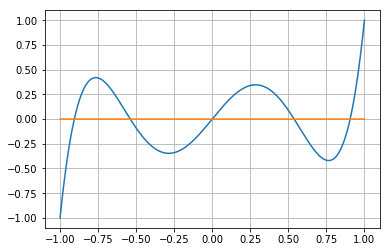

In [48]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t) #derivative

f = sym.lambdify(t, f_sym, 'numpy') #f refers to f(x)
f_prime = sym.lambdify(t,f_prime_sym, 'numpy') #

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

plot(x,f(x))
plot(x,c)
grid()


In [49]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.75
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [50]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

32
0.9061798459442798
3.858126004912865e-11


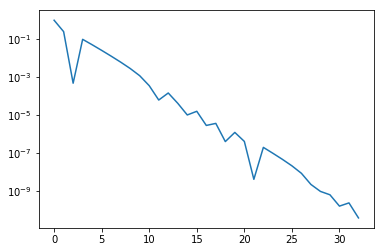

In [51]:
def bisect(f,a,b,eps,n_max):
    assert f(a)*f(b) < 0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new)
        err = abs(f(x_new))
        #err = abs(x-x_new)
        
        errors.append(err)
        x = x_new
        it += 1
    
    semilogy(errors)
    print(it)
    print(x)
    print( err)
    return( errors)
              
errors_bisect = bisect(f,a,b,eps,n_max)


             
        

In [52]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

5
0.9061798459386647
5.633945684709343e-15
CPU times: user 15 ms, sys: 3.68 ms, total: 18.7 ms
Wall time: 18 ms


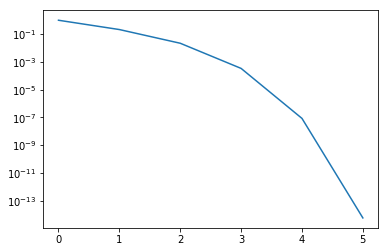

In [53]:
def newton(f,f_prime,x0,eps,n_max):
    x = x0
    err = abs(f(x0))
    errors = [err]
    it = 0
    while(err > eps and n_max > it):
        x = x - f(x)/f_prime(x)
        err = abs(f(x))
        errors.append(err)
        it += 1
        
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return(errors)

%time errors_newton = newton(f,f_prime,1.0,eps,n_max)

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

13
0.9061798459469729
5.70847473767655e-11


[1.0000000001,
 0.006559529362569946,
 0.0014248985472195051,
 0.00030157963659544065,
 6.419661289727824e-05,
 1.364886712466216e-05,
 2.9026392558147514e-06,
 6.172565693644657e-07,
 1.3126333551770074e-07,
 2.791387095392437e-08,
 5.936041870910564e-09,
 1.262333017028706e-09,
 2.6844141487715474e-10,
 5.70847473767655e-11]

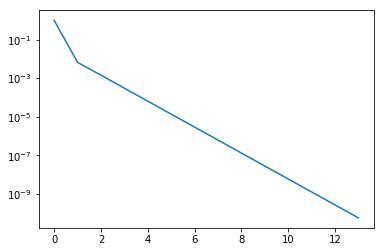

In [62]:
# interval in which we seek the solution 
a = 0.75
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b

def chord(f,a,b,x0,eps,n_max):
    x = x0
    err = abs(f(x0))
    err = eps + 1.
    errors = [err]
    it = 0
    q = (f(b)-f(a))/(b-a)
    while(err > eps and n_max > it):
        x = x - f(x)/q
        err = abs(f(x))
        errors.append(err)
        it += 1
        
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return(errors)
    

errors_chord = chord (f,a,b,x0,eps,n_max)

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

6
0.9061798459386555
5.794915561415265e-14


[0.18203353881835938,
 0.07710147514072996,
 0.015386697876379703,
 0.0009507505137719783,
 1.0600179938696439e-05,
 7.441749283077061e-09,
 5.794915561415265e-14]

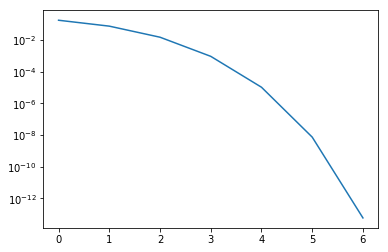

In [63]:
def secant(f,x0,x00,eps,n_max):
    x = x0
    xp = x00
    err = abs(f(x0))
    errors = [err]
    it = 0
    
    while(err > eps and n_max > it):
        b = x
        a = xp
        q = (f(b)-f(a))/(b-a)
        xp = x
        x = x - f(x)/q
        err = abs(f(x))
        errors.append(err)
        it += 1
        
        
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return(errors)
    
errors_secant = secant(f,x0,x00,eps,n_max)
errors_secant

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

11
0.5384693101084483
6.708269298482029e-12


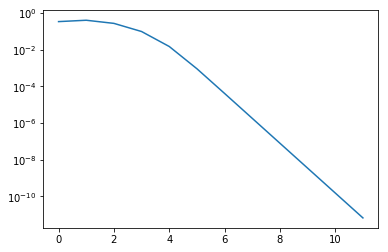

In [56]:
def fixed_point(phi,x0,eps,n_max):
    x = x0
    err = abs(f(x0))
    errors = [err]
    it = 0
    
    while(err > eps and n_max > it):
        x = phi(x)
        err = abs(f(x))
        errors.append(err)
        it += 1
        
        
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return(errors)

errors_fixed = fixed_point(phi,0.3,eps,n_max)
        

## Comparison

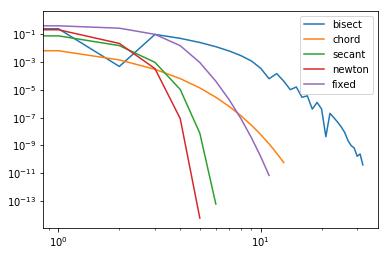

In [57]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [58]:
# Let's compare the scipy implmentation of Newton's method with our..

In [59]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 34 µs, sys: 2 µs, total: 36 µs
Wall time: 38.6 µs


0.906179845938664